In [1]:
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.dates as mdates
import datetime

from scipy.integrate import odeint
from scipy import linalg as la
from scipy import optimize
import scipy
import csv
import pandas as pd

config = {
    "text.usetex": True,
    "text.latex.preamble": r"\usepackage{CJK}",  # 预先导入CJK宏包处理中文
}
plt.rcParams.update(config)

In [16]:
# 数据加载
data = pd.read_csv("附件1.csv", encoding="GB2312")
ALL_SC = list(set(data["分拣中心"]))
data["日期"] = pd.to_datetime(data["日期"])
data = data.sort_values("日期")
# 数据加载
pre_data = pd.read_csv("future_predictions.csv")
pre_data["date"] = pd.to_datetime(pre_data["date"])
pre_data = pre_data.sort_values("date")

In [20]:
data_example_3 = (
    data[data["分拣中心"] == "SC3"].groupby("日期")["货量"].sum().reset_index()
)
dates_3 = data_example_3["日期"]
values_3 = data_example_3["货量"]

dates_3 = np.array(dates_3)
values_3 = np.array(values_3)

# 仅使用SC48分拣中心的数据作为示例
pre_data_example = pre_data.groupby("date")["value"].sum().reset_index()
pre_dates = pre_data_example["date"]
pre_values = pre_data_example["value"]

pre_dates = np.array(pre_dates)
pre_values = np.array(pre_values)
pre_values

array([1912316.34, 2104626.27, 1700710.68, 1313098.2 , 1522659.06,
       1391277.03, 1242978.48, 1541885.07, 1543619.91, 1561887.45,
       2054140.68, 1922743.41, 1599835.41, 1635327.84, 1470541.89,
       1273449.48, 1406723.31, 1247020.68, 1109877.12, 1267608.21,
       1173213.36, 1082404.5 , 1246154.01, 1119158.37, 1055532.21,
       1192923.69, 1109282.34, 1013175.24, 1195427.28, 1114994.85])

In [ ]:

with PdfPages(f"images/example.pdf") as pdf:
    plt.figure(figsize=(10, 6))
    plt.plot(dates_3, values_3, label=r"\begin{CJK*}{UTF8}{gbsn}SC6\end{CJK*}")
    plt.plot(pre_dates, pre_values, label=r"\begin{CJK*}{UTF8}{gbsn}SC41\end{CJK*}")
    plt.xlabel(r"\begin{CJK*}{UTF8}{gbsn}日期\end{CJK*}")
    plt.ylabel(r"\begin{CJK*}{UTF8}{gbsn}货量\end{CJK*}")
    plt.legend()
    plt.grid(True)

    pdf.savefig()
    plt.close()

In [22]:
# 数据加载
data = pd.read_csv("附件1.csv", encoding="GB2312")
ALL_SC = list(set(data["分拣中心"]))
data["日期"] = pd.to_datetime(data["日期"])
data = data.sort_values("日期")
# 数据加载
pre_data = pd.read_csv("future_predictions.csv")
pre_data["date"] = pd.to_datetime(pre_data["date"])
pre_data = pre_data.sort_values("date")

In [39]:
# 创建DataFrame
df = pd.DataFrame(pre_data)

# 将日期字符串转换为日期对象，以便排序
df["date"] = pd.to_datetime(df["date"])

# 按日期排序
df = df.sort_values(by="date")

In [54]:

# 新的数据
new_data = pd.read_csv("附件1.csv", encoding="GB2312")
# 创建新的DataFrame
df_new = pd.DataFrame(new_data)

# 将日期字符串转换为日期对象
df_new["日期"] = pd.to_datetime(df_new["日期"])

# 按日期排序
df_new = df_new.sort_values(by="日期")
A = [sc_id for sc_id in df["SC_ID"].unique()]
df

,SC_ID,date,value
0,37,2023-12-01,38660.41
900,31,2023-12-01,36055.78
750,42,2023-12-01,35133.97
930,11,2023-12-01,29581.95
720,3,2023-12-01,24017.65
...,...,...,...
1559,27,2023-12-30,19519.30
1619,13,2023-12-30,18885.66
1379,10,2023-12-30,14091.70
1259,34,2023-12-30,19117.81


In [45]:
# 绘图
for sc_id in df["SC_ID"].unique():
    with PdfPages(f"images/exm{sc_id}.pdf") as pdf:

        plt.figure(figsize=(10, 6))
        sc_data = df[df["SC_ID"] == sc_id]
        sc_data_new = df_new[df_new["分拣中心"] == f"SC{sc_id}"]

        plt.plot(
            sc_data["date"],
            sc_data["value"],
            label=r"\begin{CJK*}{UTF8}{gbsn}SC" + f"{sc_id}" + "预测\end{CJK*}",
        )
        plt.plot(
            sc_data_new["日期"],
            sc_data_new["货量"],
            label=r"\begin{CJK*}{UTF8}{gbsn}SC" + f"{sc_id}" + "历史值\end{CJK*}",
        )
        plt.xlabel(r"\begin{CJK*}{UTF8}{gbsn}日期\end{CJK*}")
        plt.ylabel(r"\begin{CJK*}{UTF8}{gbsn}货量\end{CJK*}")
        plt.xticks(rotation=45)
        plt.legend()
        plt.tight_layout()
        pdf.savefig()
        plt.close()

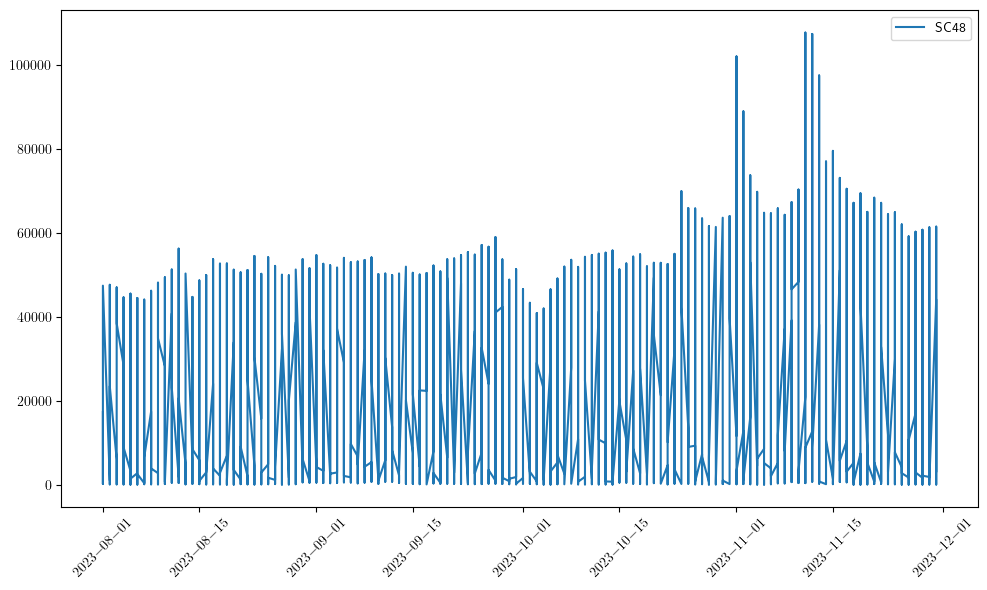

In [27]:
# 新的数据
new_data = pd.read_csv("附件1.csv", encoding="GB2312")
# 创建新的DataFrame
df_new = pd.DataFrame(new_data)

# 将日期字符串转换为日期对象
df_new['日期'] = pd.to_datetime(df_new['日期'])

# 按日期排序
df_new = df_new.sort_values(by='日期')

# 绘图
plt.figure(figsize=(10, 6))
plt.plot(df_new['日期'], df_new['货量'], label='SC48')

# plt.title('货量随时间变化 - SC48')
# plt.xlabel('日期')
# plt.ylabel('货量')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
